In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Load dataset
df = pd.read_csv("LSTM-Multivariate_pollution.csv") 

In [3]:
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
# Encode categorical variable 'wnd_dir'
encoder = LabelEncoder()
df['wnd_dir_encoded'] = encoder.fit_transform(df['wnd_dir'])

# Drop original 'wnd_dir' column
df.drop('wnd_dir', axis=1, inplace=True)

# Split into features and target
X = df.drop(['date', 'pollution'], axis=1)  # Features (excluding 'date' and 'pollution')
y = df['pollution']  # Target variable

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape data for RNN (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train RNN model
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2)

# Evaluate RNN model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

Epoch 1/50


c:\Users\ARJUN KAPADIA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


487/487 - 1s - 3ms/step - loss: 14827.8721 - val_loss: 12766.7197
Epoch 2/50
487/487 - 1s - 1ms/step - loss: 10811.3809 - val_loss: 10251.5342
Epoch 3/50
487/487 - 1s - 1ms/step - loss: 9234.3818 - val_loss: 9268.8574
Epoch 4/50
487/487 - 1s - 1ms/step - loss: 8634.6299 - val_loss: 8900.6074
Epoch 5/50
487/487 - 1s - 1ms/step - loss: 8411.0879 - val_loss: 8715.9482
Epoch 6/50
487/487 - 1s - 1ms/step - loss: 8176.8203 - val_loss: 8417.0000
Epoch 7/50
487/487 - 1s - 1ms/step - loss: 7898.2939 - val_loss: 8163.3003
Epoch 8/50
487/487 - 1s - 1ms/step - loss: 7678.4585 - val_loss: 7955.6875
Epoch 9/50
487/487 - 1s - 1ms/step - loss: 7487.5073 - val_loss: 7768.4902
Epoch 10/50
487/487 - 0s - 1ms/step - loss: 7312.7998 - val_loss: 7599.4653
Epoch 11/50
487/487 - 1s - 1ms/step - loss: 7157.3501 - val_loss: 7453.3750
Epoch 12/50
487/487 - 1s - 1ms/step - loss: 7023.2876 - val_loss: 7332.5356
Epoch 13/50
487/487 - 1s - 1ms/step - loss: 6908.9824 - val_loss: 7227.3467
Epoch 14/50
487/487 - 1s - 1

Epoch 1/50


487/487 - 1s - 1ms/step - loss: 6002.2778 - val_loss: 6391.0664
Epoch 2/50
487/487 - 1s - 1ms/step - loss: 5995.9541 - val_loss: 6386.8271
Epoch 3/50
487/487 - 1s - 1ms/step - loss: 5992.0493 - val_loss: 6381.7090
Epoch 4/50
487/487 - 1s - 1ms/step - loss: 5987.8906 - val_loss: 6387.5176
Epoch 5/50
487/487 - 1s - 2ms/step - loss: 5982.5737 - val_loss: 6386.3857
Epoch 6/50
487/487 - 1s - 2ms/step - loss: 5978.7456 - val_loss: 6375.0864
Epoch 7/50
487/487 - 1s - 1ms/step - loss: 5976.1807 - val_loss: 6365.7480
Epoch 8/50
487/487 - 1s - 2ms/step - loss: 5971.2402 - val_loss: 6362.2739
Epoch 9/50
487/487 - 1s - 1ms/step - loss: 5968.0405 - val_loss: 6361.9248
Epoch 10/50
487/487 - 1s - 2ms/step - loss: 5963.9897 - val_loss: 6353.9355
Epoch 11/50
487/487 - 1s - 2ms/step - loss: 5961.5459 - val_loss: 6351.6484
Epoch 12/50
487/487 - 1s - 2ms/step - loss: 5957.6094 - val_loss: 6349.7661
Epoch 13/50
487/487 - 1s - 2ms/step - loss: 5953.5698 - val_loss: 6346.7578
Epoch 14/50
487/487 - 1s - 2ms/s

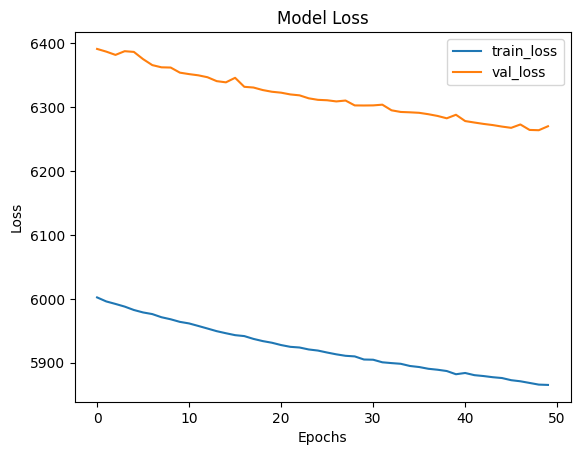

In [5]:
# Train RNN model
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2)

# Visualize loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()